In [93]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.special import comb
from itertools import combinations, permutations
from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

## __1 - Business Problem__  
___Prepare rules for the all the data sets  1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values  2) Change the minimum length in apriori algorithm  3) Visulize the obtained rules using different plots___ 

## __2 - Data collection and description__ 

In [78]:
path = 'C:/Users/SohailShaikh/OneDrive - tiqets.com/Tiqets/Adhoc/DS/Association/'
file = 'groceries.csv'

In [79]:
f = open(path+file,'rt')
reader = csv.reader(f)

In [80]:
csv_list = []
for l in reader:
    csv_list.append(l)

In [81]:
f.close()

In [82]:
df = pd.DataFrame(csv_list)

In [83]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,whole milk,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,pip fruit,yogurt,cream cheese,meat spreads,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,other vegetables,whole milk,condensed milk,long life bakery product,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [29]:
df.shape

(9835, 32)

In [61]:
records = []

In [63]:
for i in range(0, 9835):
    if i != None :
        records.append([str(df.values[i,j]) for j in range(0, 32)])

In [47]:
item_sets = {}

In [53]:
te = TransactionEncoder()

In [54]:
te_ary = te.fit(records).transform(records)

In [55]:
ap = pd.DataFrame(te_ary, columns=te.columns_)

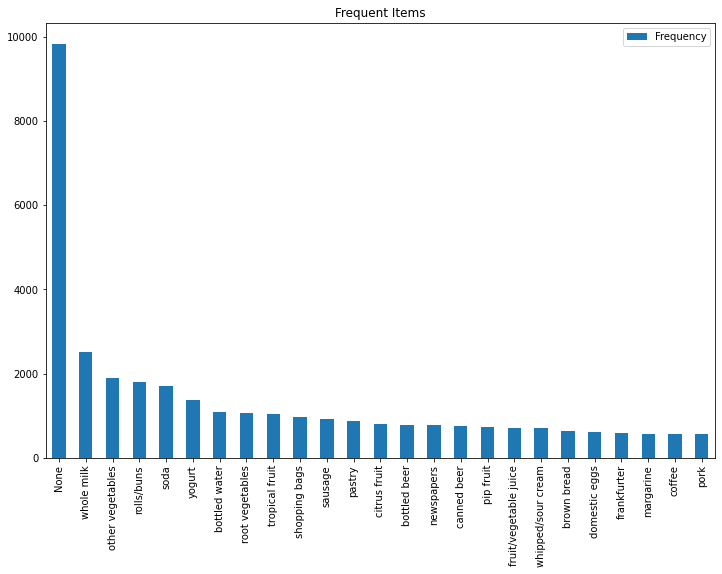

In [56]:
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',
                                                                                  figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()

## __3 - Apriori algorithm__ 

In [94]:
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [95]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [99]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(df,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [100]:
confs = []

In [101]:
for i in [0.005,0.01,0.05,0.1]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)

In [102]:
all_conf = pd.concat(confs,axis=1)

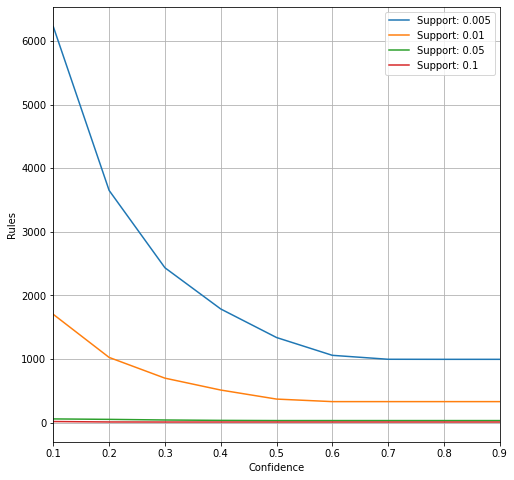

In [103]:
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

## __4 - Conclusiom__ 

As shown in above graph
1.	Lower the Confidence level Higher the no. of rules.
2.	Lower the minlen(minimum length), Higher the no. of Rules are getting generated.
3.	Higher the Support, lower the no. of rules.

### Lets try with Support 0.01 and Confidence at 0.3

In [111]:
ap_final =  apriori(ap,0.01,True)
rules_final = association_rules(ap_final,min_threshold=.3,support_only=False)

In [112]:
rules_final[rules_final['confidence'] > 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(None),0.033452,0.999898,0.033452,1.000000,1.000102,0.000003,inf
1,(baking powder),(None),0.017692,0.999898,0.017692,1.000000,1.000102,0.000002,inf
2,(beef),(None),0.052466,0.999898,0.052364,0.998062,0.998164,-0.000096,0.052466
3,(berries),(None),0.033249,0.999898,0.033249,1.000000,1.000102,0.000003,inf
4,(beverages),(None),0.026029,0.999898,0.025928,0.996094,0.996195,-0.000099,0.026029
...,...,...,...,...,...,...,...,...,...
689,"(yogurt, tropical fruit, whole milk)",(None),0.015150,0.999898,0.015048,0.993289,0.993390,-0.000100,0.015150
691,"(yogurt, tropical fruit)","(None, whole milk)",0.029283,0.255414,0.015048,0.513889,2.011981,0.007569,1.531719
693,"(yogurt, None, whipped/sour cream)",(whole milk),0.020641,0.255516,0.010778,0.522167,2.043580,0.005504,1.558044
694,"(yogurt, whole milk, whipped/sour cream)",(None),0.010880,0.999898,0.010778,0.990654,0.990755,-0.000101,0.010880


In [113]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

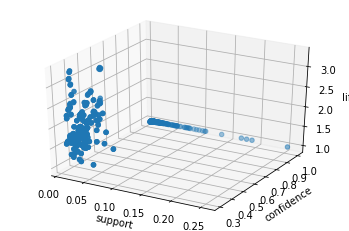

In [116]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

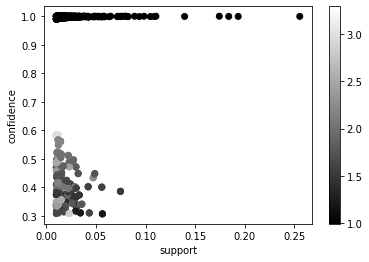

In [117]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")